# Prova Itaú

## Clustering

<b>Questão 1) </b> Considerando os dados presentes no arquivo clus01.csv, execute o algoritmo K-Means com o posicionamento inicial dos centroides sendo: [1, 1, 1, 1], [-1, -1, -1, -1] e [1, -1, 1, -1]. Qual é o posicionamento final de cada centroide após 10 iterações?

In [11]:
import pandas as pd
import numpy as np
df = pd.read_csv('asset-v1_IRONHACK+DAFT+202002_SAO+type@asset+block@clus01.csv')

In [2]:
df.head(3)

,x0,x1,x2,x3
0,-0.450370,-2.244377,-0.499678,-1.163607
1,1.866159,-1.180407,1.898348,-1.072512
2,-1.731385,0.248746,0.177045,-1.618708


In [13]:
centroides = np.array([[1, 1, 1, 1],
              [-1, -1, -1, -1],
              [1, -1, 1, -1]])

In [6]:
from sklearn.cluster import KMeans

In [59]:
# 1e-15 é dez à menos 15, zero absoluto em maquina 0,0000000000000001
kmeans = KMeans(n_clusters=3, init=centroides, n_init=1, max_iter=10, tol=1e-15)
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True,
    init=array([[ 1,  1,  1,  1],
       [-1, -1, -1, -1],
       [ 1, -1,  1, -1]]),
    max_iter=10, n_clusters=3, n_init=1, n_jobs=None,
    precompute_distances='auto', random_state=None, tol=1e-15, verbose=0)

In [60]:
kmeans.cluster_centers_

array([[ 1.01857475,  1.02553514,  0.99664363,  1.02959381],
       [-1.00267381, -1.04904824, -1.03936684, -1.01122186],
       [ 1.01263451, -1.00925279,  0.97363445, -0.99575976]])

In [61]:
kmeans.n_iter_

4

<b>Questão 2)</b> Assinale as alternativas com V ou F para Verdadeiro ou Falso respectivamente. Atente para o fato que uma questão errada anula uma certa. Em caso de dúvidas deixe em branco.

(**F**) O número mínimo de grupos no algoritmo K-Means é igual à raiz quadrada do número de elementos da base.

Número mínimo de cluster é k=1

(**F**) Devido à inicialização aleatória, o resultado final do K-Means sempre será o mesmo independentemente do critério de convergência.

O algoritmo pode convergir para um ponto ótimo que não é global, mas sim local

(**F**) O algoritmo K-Median é mais sensível a outliers do que os algoritmos K-Means, K-Mode e K-Medoid.

(**V**) O algoritmos Single-Linkage, Complete-Linkage e Average-Linkage são exemplos de algoritmos hierárquicos.

(**F**) Não é possível identificar outliers com algoritmos hierárquicos e, por este motivo, tais algoritmos requerem que os outliers sejam removidos numa etapa necessária de pré-processamento.

(**F**) Para conjuntos de dados com milhões de linhas é aconselhada a utilização de algoritmos hierárquicos em vez de algoritmos particionais pois aqueles calculam somente uma única matriz de distância.

(**V**) O Rand Index pode ser utilizado para mensurar a aderência entre o agrupamento obtido e um agrupamento de referência (por exemplo, dado por um especialista do domínio).

(**V**) O DBScan é um exemplo de algoritmo de agrupamento baseado em densidade.

**D**ensity **B**ased **Scan**ner

(**F**) Para acelerar o tempo de processamento dos algoritmos de agrupamento baseados em densidade, pode-se calcular a distância de cada elemento para o centroide de cada um dos grupos.

Não existe centróide em algoritmo de densidade. E sim o epsilon.

(**V**) O número mínimo de variáveis necessárias para realizar um agrupamento é 1.

## Prova 2

<b>Questão 1)</b> Considerando os dados do arquivo agrupamento_Q1.csv, execute o algoritmo K-means com 10 iterações tendo como posiçãoo inicial dos centroides de cada cluster as K primeiras linhas do arquivo agrup_centroides_Q1.csv. Por exemplo, para executar o algoritmo com 3 clusters considere os centroides determinados pelas 3 primeiras linhas do arquivo.

Qual a quantidade ideal de clusters? Qual o posicionamento final dos centroides do caso ideal?

In [81]:
agrup = pd.read_csv('asset-v1_IRONHACK+DAFT+202002_SAO+type@asset+block@agrupamento_Q1.csv')
agrup.head(3)

,X1,X2,X3,X4
0,-0.075701,0.470857,0.133139,-0.152900
1,-0.328561,0.427323,-0.181237,-0.173041
2,-0.470727,-0.150515,0.000954,0.070937


In [82]:
from sklearn.metrics import silhouette_score

In [83]:
centers = pd.read_csv('asset-v1_IRONHACK+DAFT+202002_SAO+type@asset+block@agrup_centroides_Q1.csv', index_col=0)
centers.head(3)

,X1,X2,X3,X4
1,1.488531,-0.430586,0.208942,0.018485
2,0.149391,1.549535,0.219688,0.917854
3,1.276714,0.844500,1.211906,-0.494781


In [91]:
distortions = []
silhouettes = []

for k in range(1, 13):
    each_centroid = centers.iloc[0:k, :]
    print(k)
    kmeans = KMeans(n_clusters=k, init=each_centroid, n_init=1, max_iter=10)
    kmeans.fit(agrup)
    distortions.append(kmeans.inertia_)
    if k > 1:
        silhouettes.append(silhouette_score(agrup, kmeans.labels_))


1
2
3
4
5
6
7
8
9
10
11
12


In [92]:
distortions

[877.9936904330698,
 530.9283567998069,
 349.85171676421714,
 255.72549496840668,
 160.01290434837847,
 154.06580485222804,
 149.17577346787732,
 142.65221196126484,
 138.6192585735264,
 136.2627570294469,
 129.41056235124267,
 127.73000149963991]

In [93]:
silhouettes

[0.37769968946322263,
 0.4311863724028486,
 0.4367436739809729,
 0.48701214584287533,
 0.41267403204713576,
 0.4152122737912366,
 0.3640595542115239,
 0.3621266685160374,
 0.36140207766995297,
 0.29780261710296396,
 0.28119357383441806]

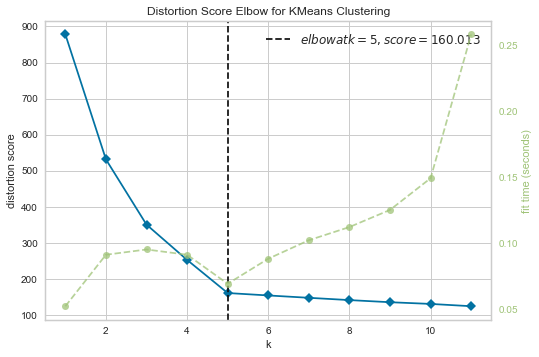

In [89]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(max_iter=10)
visualizer = KElbowVisualizer(model, k=(1,12))

visualizer.fit(agrup)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [95]:
centroids = centers.iloc[0:5, :]
kmeans = KMeans(n_clusters=5, init=centroids, n_init=1, max_iter=10)
kmeans.fit(agrup)
kmeans.cluster_centers_

array([[ 1.00809727e+00,  5.65625680e-03, -6.05882233e-03,
         2.93292716e-02],
       [ 9.95561737e-01,  6.26153151e-04, -7.80409753e-03,
         1.00152120e+00],
       [ 9.95952697e-01,  6.46273222e-03,  9.99718008e-01,
         3.14721258e-03],
       [-3.47147275e-02,  1.63162909e-02,  1.04264751e-02,
        -1.62407503e-02],
       [ 9.90740088e-01,  9.93047773e-01,  9.69936615e-01,
        -4.06482259e-03]])

In [ ]:
"""
Numero de cluster = 5

Posicionamento final dos centroides
[[ 1.00809727e+00,  5.65625680e-03, -6.05882233e-03,
         2.93292716e-02],
       [ 9.95561737e-01,  6.26153151e-04, -7.80409753e-03,
         1.00152120e+00],
       [ 9.95952697e-01,  6.46273222e-03,  9.99718008e-01,
         3.14721258e-03],
       [-3.47147275e-02,  1.63162909e-02,  1.04264751e-02,
        -1.62407503e-02],
       [ 9.90740088e-01,  9.93047773e-01,  9.69936615e-01,
        -4.06482259e-03]]
"""

<b>Questão 2)</b> Assinale as alternativas com V ou F para Verdadeiro ou Falso respectivamente. Atente para o fato que uma questão errada anula uma certa. Em caso de dúvidas deixe em branco.

(**F**) O algoritmo K-means se baseia num processo iterativo que minimiza a soma das distâncias entre os centroides e os pontos dentro de cada agrupamento.

Soma das distancias ao quadrado(variancia). K-means tenta minimizar as variancias

(**F**) O algoritmo K-means é pouco sensível a inicialização dos centroides e resulta sempre nos mesmos agrupamentos.

(**F**) Os centroides determinados pelo algoritmo K-means necessariamente pertencem ao conjunto de dados analisados

(**F**) O algoritmo K-median é mais sensível a outliers do que o algoritmo K-means.

(**F**) O algoritmo GMM (Gaussian Mixture Models) presume que os dados a serem agrupados provém de uma distribuição unimodal.

(**F**) Não é possível identificar outliers com algoritmos hierárquicos e, por este motivo, tais algoritmos requerem que os outliers sejam tratados em uma etapa necessária de pré-processamento.

(**V**) Algoritmos particionais são tipicamente mais eficientes computacionalmente do que algoritmos hierárquicos.

(**V**) Diferentemente do K-means, o DBScan é um algoritmo capaz de identificar agrupamentos com fomato de anéis concêntricos.

( ) Uma maneira eficaz de mensurar a semelhança entre dois vetores unitários de alta dimensão é calcular o produto interno entre os dois.